In [1]:
import pandas as pd

In [148]:
df = pd.read_csv('ufo.csv')


In [149]:
df.head()

,Date_Time,City,State,Shape,Duration,Summary,Date_Posted
0,5/9/19 21:15,Cincinnati,OH,Triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19
1,5/8/19 23:00,Statesboro,GA,Triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19
2,5/8/19 23:00,Norfolk,VA,Light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19
3,5/8/19 21:00,Fremont,NH,Other,Continuing up till right,Very large floating aircraft with nav-lights. ...,5/9/19
4,5/8/19 01:30,Saint George,UT,Other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119178 entries, 0 to 119177
Data columns (total 7 columns):
Date_Time      119178 non-null object
City           118940 non-null object
State          110576 non-null object
Shape          115244 non-null object
Duration       115006 non-null object
Summary        119141 non-null object
Date_Posted    119178 non-null object
dtypes: object(7)
memory usage: 6.4+ MB


In [151]:
df.Duration
import numpy as np
# def get_duration(duration):
    

In [165]:
def get_duration(duration):
    
    dursplit = duration.split()
#     print(duration)
#     print(len(dursplit))
    if len(dursplit) == 2:
        try:
            dtime = dursplit[0]
            if dtime.startswith('>') or dtime.startswith('<') or dtime.startswith('~'):
                dtime = dtime[1:]
            if dtime.endswith('+'):
                dtime = dtime[:-1]
#             print('dtime', dtime)
            if '-' in dtime:
                dtimes = dtime.split('-')
#                 print('dtimes',dtimes)
                try:
                    dtime = (int(dtimes[0])+int(dtimes[1]))/2

                except:
                    return None
            dtime = int(dtime)
            unit = dursplit[1]
            
            
#             print('dtime', dtime, 'unit', unit, unit.lower().startswith('m'))
            
            if unit.lower() == 'seconds':
                return dtime
            elif unit.lower().startswith('min'):
#                 print( 'minute')
                return dtime*60
            elif unit.lower().startswith('h'):
                return dtime*60*60
            
#             for items in dursplit:
#                 print(items)
        except:
#             print(dtime)
            return None
    if len(dursplit) == 1:
        if ':' in dursplit[0]:
            tvals = dursplit[0].split(':')
            if len(tvals)==2:
                mins = 0
                secs =0
                try:
                    mins = int(tvals[0])*60
                except:
                    pass
                try:
                    secs = int(tvals[1])
                except:
                    pass
#                 print(tvals[0])
#                 print(tvals[1])
                return mins + secs
            
        if dursplit[0].isdigit():
            return int(dursplit[0])*60

    return None

In [162]:
dtime = '30+'
dtime[:-1]

'30'

In [166]:
df.Duration[60:90]
df['Duration_sec'] = df.Duration.apply(lambda x: get_duration(str(x)))

In [178]:
df.drop_duplicates(inplace=True)

In [182]:
df.dropna(inplace=True)

In [184]:
len(df)

81127

In [188]:
import matplotlib.pyplot as plt
%matplotlib  inline



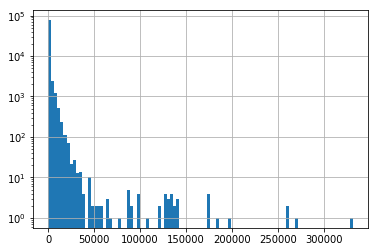

In [195]:
df.Duration_sec.hist(bins=100 )
plt.semilogy(True)

13.88888888888889

In [201]:
df['Date_Time'][0].to_date()

AttributeError: 'str' object has no attribute 'to_date'

In [206]:
df['event_date'] = pd.to_datetime(df['Date_Time'])

In [208]:
df = df.drop(['Date_Time'], axis=1)

In [209]:
df.head()

,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,Cincinnati,OH,Triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19,15.0,2019-05-09 21:15:00
1,Statesboro,GA,Triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19,20.0,2019-05-08 23:00:00
2,Norfolk,VA,Light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
4,Saint George,UT,Other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19,90.0,2019-05-08 01:30:00
5,Highlands,NC,Light,1 minute,I have about 10 recordings from last night on ...,5/9/19,60.0,2019-05-08 01:00:00


In [212]:
df.Shape[0].lower()

'triangle'

In [213]:
df.Shape = df.Shape.apply(lambda x: x.lower())

In [218]:
df.Shape.value_counts()

light         17346
circle         8793
triangle       8053
fireball       6648
sphere         5742
unknown        5595
other          5429
disk           4682
oval           3670
formation      2728
changing       2065
cigar          2013
rectangle      1427
flash          1343
cylinder       1312
diamond        1236
chevron        1030
teardrop        713
egg             699
cone            327
cross           263
delta             7
flare             1
triangular        1
round             1
crescent          1
changed           1
pyramid           1
Name: Shape, dtype: int64

In [221]:
df.to_csv('ufo_cleaned.csv',index=False)

In [224]:
df[df.Duration_sec>40000]

,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
2626,Ortonville,MI,circle,12 hours,Ortonville/ Oakland County lights. ((anonymou...,8/10/18,43200.0,2018-08-02 22:15:00
5333,Omaha,NE,unknown,1100,Line of lights that are flashing and blinking ...,11/9/17,66000.0,2017-11-08 00:45:00
8872,Uniontown,PA,circle,24 hours,All are seen on night vision camera for 5 days...,3/10/17,86400.0,2017-02-24 20:00:00
17817,Brazoria,TX,formation,48 hours,Pictures dont have to prove whats going on her...,9/11/15,172800.0,2015-09-08 22:00:00
18251,Rolling Meadows,IL,light,1601,"Orb that pulsed on and off, that fly across th...",8/27/15,96060.0,2015-08-16 16:00:00
20094,Parrish,FL,other,48 hours,Small flickering lights form into a v formatio...,5/22/15,172800.0,2015-05-14 20:00:00
21346,Seal Beach,CA,chevron,0921,The chevron craft flew towards my sister and m...,3/6/15,55260.0,2015-02-20 21:00:00
21616,Tri-cities and Yakima County,WA,flash,25 hours,The entire sky keeps lighting up like camera f...,2/6/15,90000.0,2015-01-30 00:00:00
25318,Oakland Park,FL,triangle,72 hours,3 DOTS ON MY ARM AFTER SIGHTING.. OAKLAND PAR...,8/22/14,259200.0,2014-08-18 10:00:00
27370,Detroit,MI,circle,1300,There is a possibility that its a ufo.,6/20/14,78000.0,2014-06-15 01:00:00


In [228]:
get_duration(df.Duration[100047])

139800

In [232]:
duration = df.Duration[100047]
duration

'2330'